In [1]:
import json
import matplotlib.pyplot as plt

with open("semgrep-results.json", "r") as file:
    data = json.load(file)

with open("prettified-semgrep-results.json", "w") as outfile:
    json.dump(data, outfile, indent=4)

print("Formatted JSON saved as 'prettified-medium-high-critical-report.json'")

Formatted JSON saved as 'prettified-medium-high-critical-report.json'


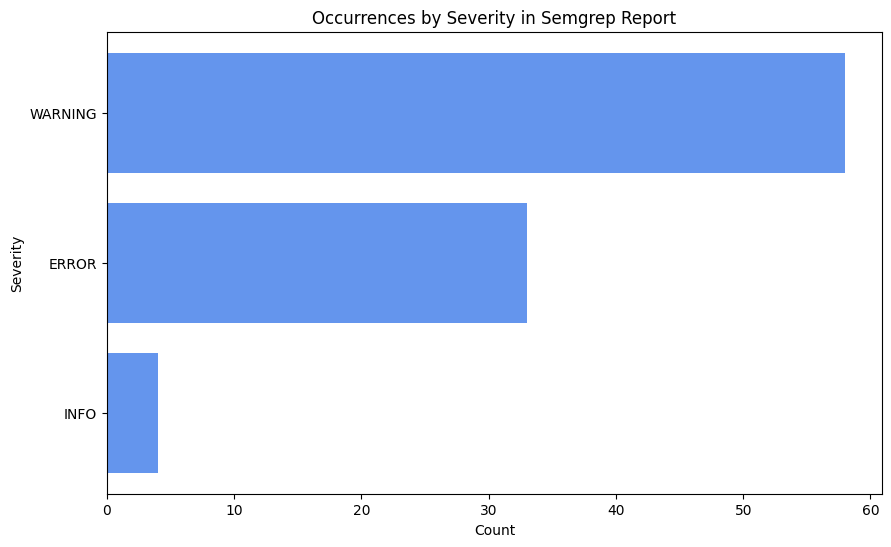

Occurrences by Severity:
ERROR: 33
INFO: 4


In [2]:
# Extract findings
findings = data.get("results", [])

# Count occurrences by severity
severity_counts = {}
for finding in findings:
    severity = finding.get("extra", {}).get("severity", "unknown")
    severity_counts[severity] = severity_counts.get(severity, 0) + 1

# Prepare data for plotting
severities = sorted(severity_counts.keys(), key=lambda x: severity_counts[x], reverse=True)
counts = [severity_counts[sev] for sev in severities]

# Plot occurrences by severity
plt.figure(figsize=(10, 6))
plt.barh(severities, counts, color='cornflowerblue')
plt.title("Occurrences by Severity in Semgrep Report")
plt.xlabel("Count")
plt.ylabel("Severity")
plt.gca().invert_yaxis()
plt.show()

# Print the counts for each severity
print("Occurrences by Severity:")
for severity, count in severity_counts.items():
    print(f"{severity}: {count}")

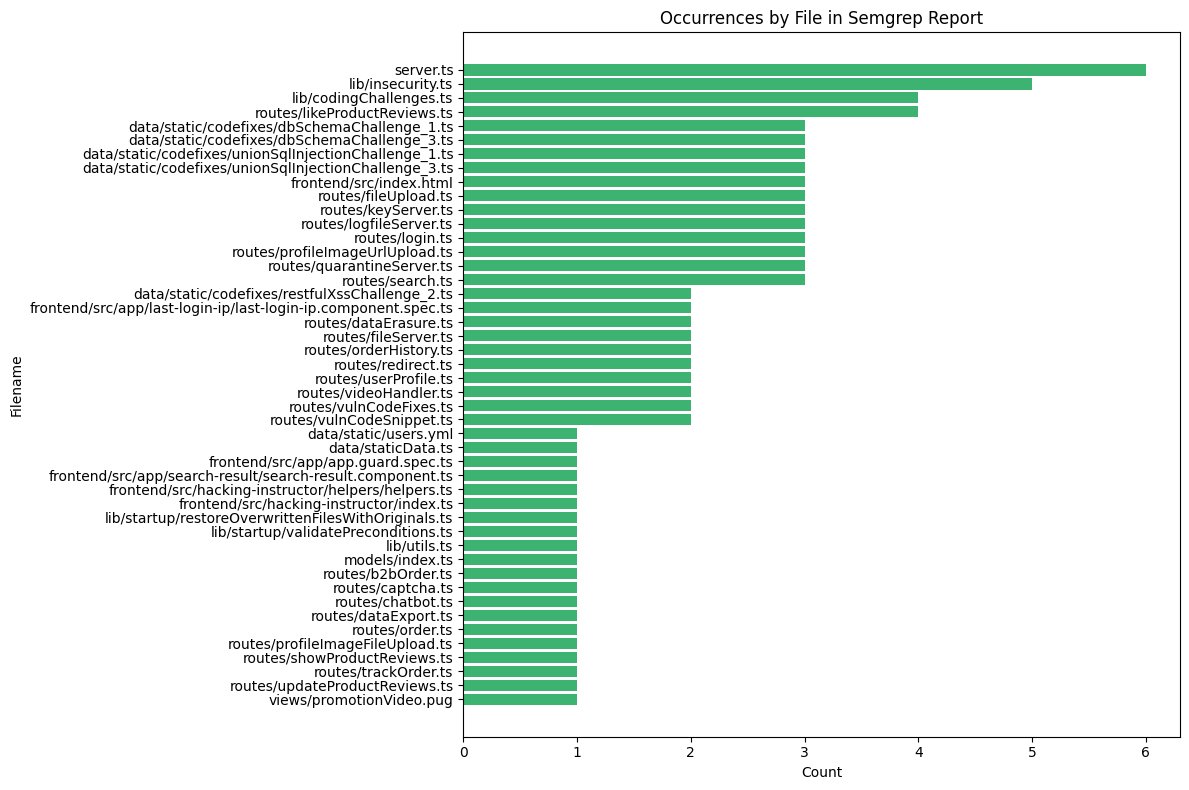

Occurrences by File:
server.ts: 6
lib/insecurity.ts: 5
lib/codingChallenges.ts: 4
routes/likeProductReviews.ts: 4
data/static/codefixes/dbSchemaChallenge_1.ts: 3
data/static/codefixes/dbSchemaChallenge_3.ts: 3
data/static/codefixes/unionSqlInjectionChallenge_1.ts: 3
data/static/codefixes/unionSqlInjectionChallenge_3.ts: 3
frontend/src/index.html: 3
routes/fileUpload.ts: 3
routes/keyServer.ts: 3
routes/logfileServer.ts: 3
routes/login.ts: 3
routes/profileImageUrlUpload.ts: 3
routes/quarantineServer.ts: 3
routes/search.ts: 3
data/static/codefixes/restfulXssChallenge_2.ts: 2
frontend/src/app/last-login-ip/last-login-ip.component.spec.ts: 2
routes/dataErasure.ts: 2
routes/fileServer.ts: 2
routes/orderHistory.ts: 2
routes/redirect.ts: 2
routes/userProfile.ts: 2
routes/videoHandler.ts: 2
routes/vulnCodeFixes.ts: 2
routes/vulnCodeSnippet.ts: 2
data/static/users.yml: 1
data/staticData.ts: 1
frontend/src/app/app.guard.spec.ts: 1
frontend/src/app/search-result/search-result.component.ts: 1
front

In [3]:
# Extract findings
findings = data.get("results", [])

# Count occurrences by filename
file_counts = {}
for finding in findings:
    filename = finding.get("path", "unknown")
    file_counts[filename] = file_counts.get(filename, 0) + 1

# Sort by count
sorted_file_counts = dict(sorted(file_counts.items(), key=lambda item: item[1], reverse=True))

# Prepare data for plotting
filenames = list(sorted_file_counts.keys())
counts = list(sorted_file_counts.values())

# Plot occurrences by filename
plt.figure(figsize=(12, 8))
plt.barh(filenames, counts, color='mediumseagreen')
plt.title("Occurrences by File in Semgrep Report")
plt.xlabel("Count")
plt.ylabel("Filename")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Print the counts for each filename
print("Occurrences by File:")
for filename, count in sorted_file_counts.items():
    print(f"{filename}: {count}")

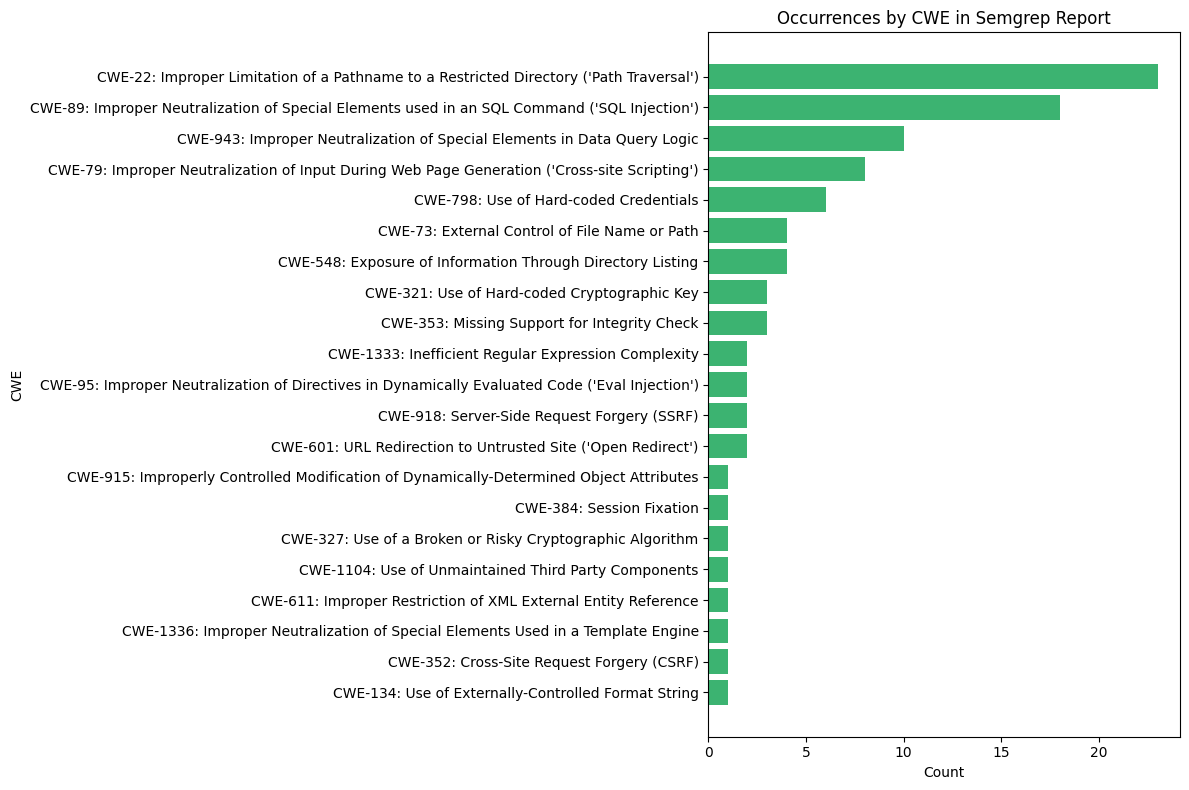

Occurrences by CWE:
CWE-22: Improper Limitation of a Pathname to a Restricted Directory ('Path Traversal'): 23
CWE-89: Improper Neutralization of Special Elements used in an SQL Command ('SQL Injection'): 18
CWE-943: Improper Neutralization of Special Elements in Data Query Logic: 10
CWE-79: Improper Neutralization of Input During Web Page Generation ('Cross-site Scripting'): 8
CWE-798: Use of Hard-coded Credentials: 6
CWE-73: External Control of File Name or Path: 4
CWE-548: Exposure of Information Through Directory Listing: 4
CWE-321: Use of Hard-coded Cryptographic Key: 3
CWE-353: Missing Support for Integrity Check: 3
CWE-1333: Inefficient Regular Expression Complexity: 2
CWE-95: Improper Neutralization of Directives in Dynamically Evaluated Code ('Eval Injection'): 2
CWE-918: Server-Side Request Forgery (SSRF): 2
CWE-601: URL Redirection to Untrusted Site ('Open Redirect'): 2
CWE-915: Improperly Controlled Modification of Dynamically-Determined Object Attributes: 1
CWE-384: Sessio

In [4]:
# Extract findings
findings = data.get("results", [])

# Count occurrences by CWE
cwe_counts = {}
for finding in findings:
    cwe_list = finding.get("extra", {}).get("metadata", {}).get("cwe", [])
    for cwe in cwe_list:
        cwe_counts[cwe] = cwe_counts.get(cwe, 0) + 1

# Sort by count
sorted_cwe_counts = dict(sorted(cwe_counts.items(), key=lambda item: item[1], reverse=True))

# Prepare data for plotting
cwes = list(sorted_cwe_counts.keys())
counts = list(sorted_cwe_counts.values())

# Plot occurrences by CWE
plt.figure(figsize=(12, 8))
plt.barh(cwes, counts, color='mediumseagreen')
plt.title("Occurrences by CWE in Semgrep Report")
plt.xlabel("Count")
plt.ylabel("CWE")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Print the counts for each CWE
print("Occurrences by CWE:")
for cwe, count in sorted_cwe_counts.items():
    print(f"{cwe}: {count}")


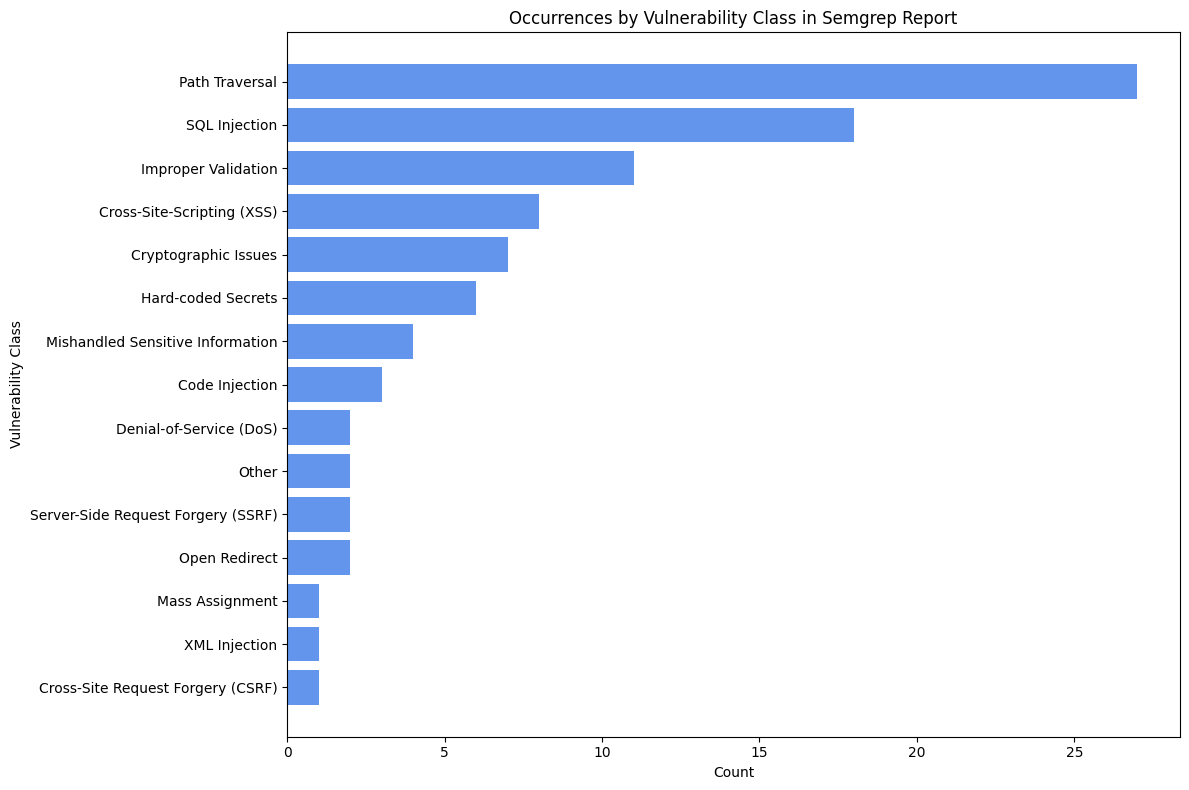

Occurrences by Vulnerability Class:
Path Traversal: 27
SQL Injection: 18
Improper Validation: 11
Cross-Site-Scripting (XSS): 8
Cryptographic Issues: 7
Hard-coded Secrets: 6
Mishandled Sensitive Information: 4
Code Injection: 3
Denial-of-Service (DoS): 2
Other: 2
Server-Side Request Forgery (SSRF): 2
Open Redirect: 2
Mass Assignment: 1
XML Injection: 1
Cross-Site Request Forgery (CSRF): 1


In [5]:
# Extract findings
findings = data.get("results", [])

# Count occurrences by vulnerability class
vulnerability_class_counts = {}
for finding in findings:
    vuln_classes = finding.get("extra", {}).get("metadata", {}).get("vulnerability_class", [])
    for vuln_class in vuln_classes:
        vulnerability_class_counts[vuln_class] = vulnerability_class_counts.get(vuln_class, 0) + 1

# Sort by count
sorted_vuln_class_counts = dict(sorted(vulnerability_class_counts.items(), key=lambda item: item[1], reverse=True))

# Prepare data for plotting
vuln_classes = list(sorted_vuln_class_counts.keys())
counts = list(sorted_vuln_class_counts.values())

# Plot occurrences by Vulnerability Class
plt.figure(figsize=(12, 8))
plt.barh(vuln_classes, counts, color='cornflowerblue')
plt.title("Occurrences by Vulnerability Class in Semgrep Report")
plt.xlabel("Count")
plt.ylabel("Vulnerability Class")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Print the counts for each Vulnerability Class
print("Occurrences by Vulnerability Class:")
for vuln_class, count in sorted_vuln_class_counts.items():
    print(f"{vuln_class}: {count}")

In [8]:
# Filter findings by severity 'WARNING'
severity = "WARNING"
filtered_findings = [
    finding for finding in findings
    if finding.get("extra", {}).get("severity", "").upper() == severity.upper()
]

# Group by vulnerability class and display associated files
vuln_class_files = {}
for finding in filtered_findings:
    vuln_classes = finding.get("extra", {}).get("metadata", {}).get("vulnerability_class", [])
    file_path = finding.get("path", "unknown")
    for vuln_class in vuln_classes:
        if vuln_class not in vuln_class_files:
            vuln_class_files[vuln_class] = set()  # Use a set to avoid duplicate files
        vuln_class_files[vuln_class].add(file_path)

# Display the grouped results
if vuln_class_files:
    print(f"Vulnerability Classes and Associated Files for Severity '{severity}':")
    for vuln_class, files in vuln_class_files.items():
        print(f"\nVulnerability Class: {vuln_class}")
        print("Affected Files:")
        for file in sorted(files):
            print(f"  - {file}")
else:
    print(f"No vulnerabilities found with severity '{severity}'.")

Vulnerability Classes and Associated Files for Severity 'WARNING':

Vulnerability Class: Path Traversal
Affected Files:
  - data/staticData.ts
  - lib/codingChallenges.ts
  - lib/startup/restoreOverwrittenFilesWithOriginals.ts
  - lib/startup/validatePreconditions.ts
  - routes/dataErasure.ts
  - routes/fileServer.ts
  - routes/fileUpload.ts
  - routes/keyServer.ts
  - routes/logfileServer.ts
  - routes/order.ts
  - routes/profileImageFileUpload.ts
  - routes/profileImageUrlUpload.ts
  - routes/quarantineServer.ts
  - routes/vulnCodeFixes.ts
  - routes/vulnCodeSnippet.ts

Vulnerability Class: Cross-Site-Scripting (XSS)
Affected Files:
  - frontend/src/app/search-result/search-result.component.ts
  - routes/chatbot.ts
  - routes/videoHandler.ts
  - views/promotionVideo.pug

Vulnerability Class: Mass Assignment
Affected Files:
  - frontend/src/hacking-instructor/helpers/helpers.ts

Vulnerability Class: Cryptographic Issues
Affected Files:
  - frontend/src/index.html
  - lib/utils.ts

Vul